# Multi-class Classification Model

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [58]:
# The data contains 70,000 28 × 28 images (60,000 as training and 10,000 as testing)

fashion_mnist_train = pd.read_csv('fashion-mnist_train.csv')
print('The shape for the fashion_mnist_train is', fashion_mnist_train.shape)

fashion_mnist_test = pd.read_csv('fashion-mnist_test.csv')
print('The shape for the fashion_mnist_test is', fashion_mnist_test.shape)

The shape for the fashion_mnist_train is (60000, 785)
The shape for the fashion_mnist_test is (10000, 785)


In [59]:
X, y = fashion_mnist_train[fashion_mnist_train.columns.values[1:]],\
fashion_mnist_train['label']
print('The shape for X, y are {} and {}, respectively.'.format(X.shape, y.shape))

# Standardize all the numerical features
ss = StandardScaler()
X_std = ss.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)

The shape for X, y are (60000, 784) and (60000,), respectively.


## KNN

In [60]:
X_test, y_test = fashion_mnist_test[fashion_mnist_train.columns.values[1:]],\
fashion_mnist_test['label']

In [61]:
# # three-fold cross-validation using GridSearchCV
# grid = {'n_neighbors': [10, 20, 30, 40, 50]}
# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(estimator = knn, 
#                            param_grid = grid,
#                            cv = 3, 
#                            scoring = 'accuracy')
# knn_cv = grid_search.fit(X_std, y)
# print('The best parameters using 3-fold cv is {}'.format(knn_cv.best_params_))

In [62]:
# # three-fold cross-validation using GridSearchCV
# grid = {'n_neighbors': [1, 5, 10, 15]}
# knn = KNeighborsClassifier()
# grid_search = GridSearchCV(estimator = knn, 
#                            param_grid = grid,
#                            cv = 3, 
#                            scoring = 'accuracy')
# knn_cv = grid_search.fit(X_std, y)
# print('The best parameters using 3-fold cv is {}'.format(knn_cv.best_params_))

In [63]:
# three-fold cross-validation using GridSearchCV
grid = {'n_neighbors': [1, 3, 5, 7, 9]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, 
                           param_grid = grid,
                           cv = 3, 
                           scoring = 'accuracy')
knn_cv = grid_search.fit(X_std, y)
print('The best parameters using 3-fold cv is {}'.format(knn_cv.best_params_))

The best parameters using 3-fold cv is {'n_neighbors': 7}


In [64]:
knn_cv.cv_results_

{'mean_fit_time': array([0.32919987, 0.231685  , 0.23889605, 0.23066394, 0.25640774]),
 'std_fit_time': array([0.12493753, 0.00559626, 0.00768034, 0.00458852, 0.01726862]),
 'mean_score_time': array([22.45906464, 24.60276763, 33.16472356, 31.72917533, 32.58077168]),
 'std_score_time': array([0.71559046, 0.23635442, 1.55107694, 0.53132565, 0.91980001]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9}],
 'split0_test_score': array([0.84135, 0.85125, 0.8529 , 0.85255, 0.8495 ]),
 'split1_test_score': array([0.84535, 0.8503 , 0.8513 , 0.8526 , 0.85145]),
 'split2_test_score': array([0.84415, 0.8485 , 0.8474 , 0.8479 , 0.8469 ]),
 'mean_test_score': array([0.84361667, 0.85001667, 0.85053333, 0.85101667, 0.84928333]),
 'std_test_score': array([0.00167597, 0.00

In [66]:
neigh = KNeighborsClassifier(n_neighbors=7).fit(X_std, y)
y_pred_knn = neigh.predict(ss.fit_transform(X_test))
cm = confusion_matrix(y_test, y_pred_knn)
correct_classification_rate = np.round(np.diagonal(cm) / np.sum(cm, axis = 0), 3)
correct_classification_rate = pd.DataFrame(data = correct_classification_rate.reshape(1, -1),
                                      columns = np.arange(0, 10), index = ['Correct Classification Rate'])
correct_classification_rate

,0,1,2,3,4,5,6,7,8,9
Correct Classification Rate,0.765,0.988,0.787,0.913,0.793,0.989,0.649,0.873,0.982,0.89


In [67]:
overall_correct_classification_rate = np.round(np.sum(np.diagonal(cm)) / np.sum(cm), 4)
overall_correct_classification_rate

0.8601

In [54]:
np.save('KNN Prediction', y_pred_knn)

In [7]:
principal_axes = np.load('Principal components.npy')

## Decision Tree Classifier

In [ ]:
clf_dt = DecisionTreeClassifier().fit(X_std, y)
clf_dt.max_features_

In [24]:
# three-fold cross-validation using GridSearchCV
grid = {'max_depth': [100, 500]}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf, 
                           param_grid = grid,
                           cv = 3, 
                           scoring = 'accuracy')
clf_cv = grid_search.fit(X_std, y)
print('The best parameters using 3-fold cv is {}'.format(clf_cv.best_params_))

The best parameters using 3-fold cv is {'max_depth': 500}


In [25]:
# three-fold cross-validation using GridSearchCV
grid = {'max_depth': [300, 500]}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf, 
                           param_grid = grid,
                           cv = 3, 
                           scoring = 'accuracy')
clf_cv = grid_search.fit(X_std, y)
print('The best parameters using 3-fold cv is {}'.format(clf_cv.best_params_))

The best parameters using 3-fold cv is {'max_depth': 500}


In [26]:
clf_cv.cv_results_
# There are no significant difference in validation performance between choices of max_depth = 300 and 500.
# So for the simplicity of computation, we choose max_depth = 300 as out optimal hyperparameter

{'mean_fit_time': array([18.6076978 , 18.14103293]),
 'std_fit_time': array([0.46636694, 0.29448501]),
 'mean_score_time': array([0.06970906, 0.05395508]),
 'std_score_time': array([0.00188434, 0.00405395]),
 'param_max_depth': masked_array(data=[300, 500],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 300}, {'max_depth': 500}],
 'split0_test_score': array([0.79525, 0.7954 ]),
 'split1_test_score': array([0.7887, 0.7888]),
 'split2_test_score': array([0.78735, 0.78875]),
 'mean_test_score': array([0.79043333, 0.79098333]),
 'std_test_score': array([0.0034502 , 0.00312312]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [29]:
clf_dt = DecisionTreeClassifier(max_depth = 300).fit(X_std, y)
y_pred_dt = clf_dt.predict(ss.fit_transform(X_test))
cm = confusion_matrix(y_test, y_pred_dt)
correct_classification_rate = np.round(np.diagonal(cm) / np.sum(cm, axis = 0), 4)
correct_classification_rate = pd.DataFrame(data = correct_classification_rate.reshape(1, -1),
                                      columns = np.arange(0, 10), index = ['Correct Classification Rate'])
correct_classification_rate

,0,1,2,3,4,5,6,7,8,9
Correct Classification Rate,0.7442,0.9443,0.6862,0.8208,0.665,0.9043,0.5611,0.8449,0.9191,0.8859


In [30]:
overall_correct_classification_rate = np.round(np.sum(np.diagonal(cm)) / np.sum(cm), 4)
overall_correct_classification_rate

0.7967

In [55]:
np.save('Decision Tree Prediction', y_pred_dt)

## SVM

In [41]:
svc = SVC(random_state = 123)
regularization = [0.1, 0.5, 1, 5]
kernel_type = ['linear', 'poly', 'rbf']

# define grid search
grid = dict(C = regularization, kernel = kernel_type, class_weight = class_weight)
grid_search = GridSearchCV(estimator = svc, 
                           param_grid = grid, 
                           n_jobs = -1, 
                           cv = 3, 
                           scoring = 'accuracy', 
                           error_score = 0)
svc_cv = grid_search.fit(X_std @ principal_axes[:, :10], y)
print('The best parameters using 3-fold cv is {}'.format(svc_cv.best_params_))

The best parameters using 3-fold cv is {'C': 0.1}
The best parameters using 3-fold cv is {'kernel': poly}


In [49]:
svc = SVC(random_state = 123).fit(X_std @ principal_axes[:, :30], y)
y_pred_svm = svc.predict(ss.fit_transform(X_test) @ principal_axes[:, :30])
cm = confusion_matrix(y_test, y_pred_svm)
correct_classification_rate = np.round(np.diagonal(cm) / np.sum(cm, axis = 0), 4)
correct_classification_rate = pd.DataFrame(data = correct_classification_rate.reshape(1, -1),
                                      columns = np.arange(0, 10), index = ['Correct Classification Rate'])
correct_classification_rate

,0,1,2,3,4,5,6,7,8,9
Correct Classification Rate,0.7377,0.9602,0.7305,0.8275,0.7062,0.8644,0.6007,0.8522,0.9263,0.9053


In [50]:
overall_correct_classification_rate = np.round(np.sum(np.diagonal(cm)) / np.sum(cm), 4)
overall_correct_classification_rate

0.8137

In [56]:
np.save('Support Vector Machine Prediction', y_pred_svm)

## LDA

In [13]:
clf_LDA = LDA().fit(X_std @ principal_axes, y)
y_pred_LDA = clf_LDA.predict(ss.fit_transform(X_test) @ principal_axes)
cm = confusion_matrix(y_test, y_pred_LDA)
correct_classification_rate = np.round(np.diagonal(cm) / np.sum(cm, axis = 0), 4)
correct_classification_rate = pd.DataFrame(data = correct_classification_rate.reshape(1, -1),
                                      columns = np.arange(0, 10), index = ['Correct Classification Rate'])
correct_classification_rate

,0,1,2,3,4,5,6,7,8,9
Correct Classification Rate,0.8013,0.9958,0.7553,0.8233,0.7469,0.8616,0.581,0.8712,0.9376,0.9016


In [14]:
overall_correct_classification_rate = np.round(np.sum(np.diagonal(cm)) / np.sum(cm), 4)
overall_correct_classification_rate

0.8253

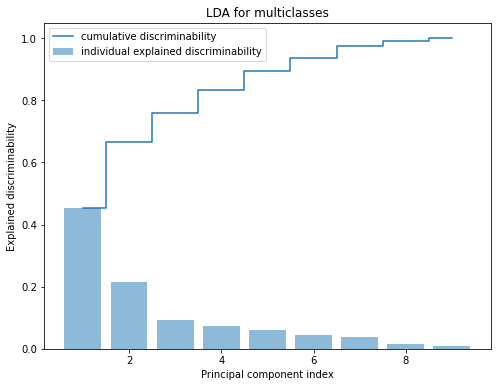

In [32]:
linear_discriminants = clf_LDA.explained_variance_ratio_

plt.figure(figsize = (8,6))
cum_seperation = np.cumsum(linear_discriminants)
plt.bar(range(1,10), linear_discriminants, alpha = 0.5, align = 'center',
         label='individual explained discriminability')
plt.step(range(1,10), cum_seperation, where='mid',
        label='cumulative discriminability')
plt.ylabel('Explained discriminability')
plt.xlabel('Principal component index')
plt.title("LDA for multiclasses")
plt.legend(loc='best')
plt.show()

## QDA

In [131]:
clf = QDA(reg_param = 1e-6).fit(X_std @ principal_axes[:, :200], y)
y_pred_QDA = clf.predict(ss.fit_transform(X_test) @ principal_axes[:, :200])
cm = confusion_matrix(y_test, y_pred_QDA)
correct_classification_rate = np.round(np.diagonal(cm) / np.sum(cm, axis = 0), 4)
correct_classification_rate = pd.DataFrame(data = correct_classification_rate.reshape(1, -1),
                                      columns = np.arange(0, 10), index = ['Correct Classification Rate'])
correct_classification_rate

,0,1,2,3,4,5,6,7,8,9
Correct Classification Rate,0.7583,0.9235,0.8103,0.7266,0.5445,0.888,0.4043,0.5903,0.7967,0.9385


In [109]:
overall_correct_classification_rate = np.round(np.sum(np.diagonal(cm)) / np.sum(cm), 4)
overall_correct_classification_rate

0.7248

## Logistics Regression

In [132]:
clf = LogisticRegression(random_state=0, max_iter=100).fit(X_std @ principal_axes, y)
y_pred_logit = clf.predict(ss.fit_transform(X_test) @ principal_axes)
cm = confusion_matrix(y_test, y_pred_logit)
correct_classification_rate = np.round(np.diagonal(cm) / np.sum(cm, axis = 0), 4)
correct_classification_rate = pd.DataFrame(data = correct_classification_rate.reshape(1, -1),
                                      columns = np.arange(0, 10), index = ['Correct Classification Rate'])
correct_classification_rate

/Users/yujingyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,1,2,3,4,5,6,7,8,9
Correct Classification Rate,0.7826,0.9683,0.7748,0.8739,0.7782,0.9262,0.633,0.9034,0.9406,0.9232


In [111]:
overall_correct_classification_rate = np.round(np.sum(np.diagonal(cm)) / np.sum(cm), 4)
overall_correct_classification_rate

0.8515

## AdaBoosting

In [118]:
# three-fold cross-validation using GridSearchCV
grid = {'n_estimators': [30, 50, 70, 90, 120]}
clf = AdaBoostClassifier(random_state=0)
grid_search = GridSearchCV(estimator = clf, 
                           param_grid = grid,
                           cv = 3, 
                           scoring = 'accuracy')
clf_cv = grid_search.fit(X_std, y)
print('The best parameters using 3-fold cv is {}'.format(clf_cv.best_params_))

The best parameters using 3-fold cv is {'n_estimators': 30}


In [119]:
# three-fold cross-validation using GridSearchCV
grid = {'n_estimators': [10, 20, 30, 40]}
clf = AdaBoostClassifier(random_state=0)
grid_search = GridSearchCV(estimator = clf, 
                           param_grid = grid,
                           cv = 3, 
                           scoring = 'accuracy')
clf_cv = grid_search.fit(X_std, y)
print('The best parameters using 3-fold cv is {}'.format(clf_cv.best_params_))

The best parameters using 3-fold cv is {'n_estimators': 30}


In [120]:
clf_cv.cv_results_

{'mean_fit_time': array([ 8.06501778, 15.93393874, 23.96790202, 31.81279667]),
 'std_fit_time': array([0.2021943 , 0.0382857 , 0.05851154, 0.08324994]),
 'mean_score_time': array([0.14884456, 0.28197996, 0.42024136, 0.55077473]),
 'std_score_time': array([0.0297393 , 0.02173477, 0.01210866, 0.03099474]),
 'param_n_estimators': masked_array(data=[10, 20, 30, 40],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40}],
 'split0_test_score': array([0.4254 , 0.4881 , 0.54085, 0.5476 ]),
 'split1_test_score': array([0.4993 , 0.52055, 0.5262 , 0.53245]),
 'split2_test_score': array([0.38685, 0.47465, 0.51175, 0.4759 ]),
 'mean_test_score': array([0.43718333, 0.49443333, 0.52626667, 0.51865   ]),
 'std_test_score': array([0.04665752, 0.01926631, 0.01188012, 0.03085506]),
 'rank_test_score': array([4, 3, 1, 2], dtype=int32)}

In [127]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_std @ principal_axes, y)
y_pred = clf.predict(ss.fit_transform(X_test) @ principal_axes)
cm = confusion_matrix(y_test, y_pred)
correct_classification_rate = np.round(np.diagonal(cm) / np.sum(cm, axis = 0), 4)
correct_classification_rate = pd.DataFrame(data = correct_classification_rate.reshape(1, -1),
                                      columns = np.arange(0, 10), index = ['Correct Classification Rate'])
correct_classification_rate

,0,1,2,3,4,5,6,7,8,9
Correct Classification Rate,0.5733,0.5757,0.4642,0.4624,0.3008,0.7534,0.2254,0.4535,0.8845,0.8785


In [128]:
overall_correct_classification_rate = np.round(np.sum(np.diagonal(cm)) / np.sum(cm), 4)
overall_correct_classification_rate

0.5029